<a href="https://colab.research.google.com/github/myl941222/Cifar10_dataset/blob/main/MSDS458_Assignment_02_JM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import packages needed 

In [ ]:
# Helper libraries
import datetime
from packaging import version
import matplotlib.pyplot as plt
import seaborn as sns
import time

import sklearn
from sklearn.metrics import confusion_matrix
from collections import Counter
import numpy as np
import pandas as pd

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense


import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist

In [ ]:
%matplotlib inline
np.set_printoptions(precision=3, suppress=True)

### Verify TensorFlow Version and Keras Version

In [ ]:
print("This notebook requires TensorFlow 2.0 or above")
print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >=2

This notebook requires TensorFlow 2.0 or above
TensorFlow version:  2.5.0


In [ ]:
print("Keras version: ", keras.__version__)

Keras version:  2.5.0


### Mount Google Drive to Colab Enviorment

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
(train_images, train_labels),(test_images, test_labels)= tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
print('train_images:\t{}'.format(train_images.shape))
print('train_labels:\t{}'.format(train_labels.shape))
print('test_images:\t\t{}'.format(test_images.shape))
print('test_labels:\t\t{}'.format(test_labels.shape))

train_images:	(50000, 32, 32, 3)
train_labels:	(50000, 1)
test_images:		(10000, 32, 32, 3)
test_labels:		(10000, 1)


In [ ]:
print("First ten labels training dataset:\n {}\n".format(train_labels[0:10]))
print("This output the numeric label, need to convert to item description")

First ten labels training dataset:
 [[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]

This output the numeric label, need to convert to item description


### Plot Examples

In [ ]:
def get_three_classes(x, y):
    def indices_of(class_id):
        indices, _ = np.where(y == float(class_id))
        return indices

    indices = np.concatenate([indices_of(0), indices_of(1), indices_of(2)], axis=0)
    
    x = x[indices]
    y = y[indices]
    
    count = x.shape[0]
    indices = np.random.choice(range(count), count, replace=False)
    
    x = x[indices]
    y = y[indices]
    
    y = tf.keras.utils.to_categorical(y)
    
    return x, y

In [ ]:
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
x_preview, y_preview = get_three_classes(x_train, y_train)
x_preview, y_preview = get_three_classes(x_test, y_test)

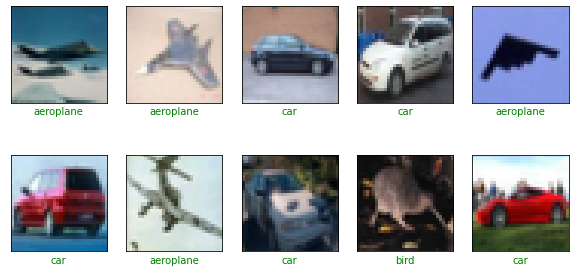

In [ ]:
class_names_preview = ['aeroplane', 'car', 'bird']

def show_random_examples(x, y, p):
    indices = np.random.choice(range(x.shape[0]), 10, replace=False)
    
    x = x[indices]
    y = y[indices]
    p = p[indices]
    
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
        col = 'green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
        plt.xlabel(class_names_preview[np.argmax(p[i])], color=col)
    plt.show()

show_random_examples(x_preview, y_preview, y_preview)

### Random Review of Examples 

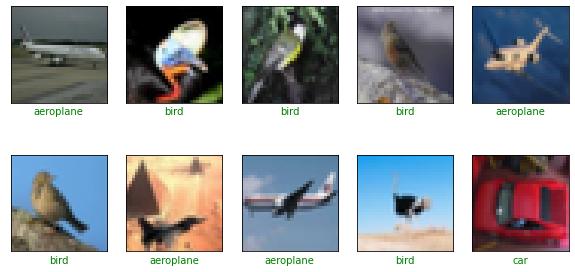

In [ ]:
show_random_examples(x_preview, y_preview, y_preview)

## Preprocessing Data for Model Development

The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

|Label  |Class_  |
|-------|--------|
|0|	airplane     |
|1|	automobile   |
|2|	bird         |
|3|	cat          |
|4|	deer         |
|5|	dog          |
|6|	frog         |
|7|	horse        |
|8|	ship         |
|9|	truck        |

In [ ]:
class_names = ['airplane'
,'automobile'
,'bird'
,'cat'
,'deer'
,'dog'
,'frog' 
,'horse'
,'ship'
,'truck']

In [ ]:
train_images_norm = train_images.astype('float32')/255.
test_images_norm = test_images.astype('float32')/255.

In [ ]:
train_images_norm.shape, test_images_norm.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

## Validating our approach

10,000 samples of our training data to use as a validation set. 

In [ ]:
val_images_norm, train_images_norm = train_images_norm[:3000], train_images_norm[3000:] 
val_labels, train_labels = train_labels[:3000], train_labels[3000:]

In [ ]:
val_images_norm.shape, val_labels.shape

((3000, 32, 32, 3), (3000, 1))

In [ ]:
train_images_norm.shape, train_labels.shape

((47000, 32, 32, 3), (47000, 1))

## Create the Model

In [ ]:
### experiment 1: DNN with 2 layers (no regularization)

In [ ]:
model_1 = Sequential()
model_1.add(Flatten(input_shape=[32, 32, 3]))
model_1.add(Dense(128, activation = tf.nn.relu))
model_1.add(Dense(10,activation = tf.nn.softmax))

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               393344    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.compile(optimizer='rmsprop',           
               loss = 'sparse_categorical_crossentropy',
               metrics=['accuracy'])
start_time_E1 = time.process_time()


In [ ]:
history_1 = model_1.fit(
    train_images_norm
    ,train_labels
    ,epochs = 30
    ,validation_data=(val_images_norm,val_labels)
    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)] 
    )

Epoch 1/30
1469/1469 [==============================] - 7s 4ms/step - loss: 1.9730 - accuracy: 0.2989 - val_loss: 1.9201 - val_accuracy: 0.3123
Epoch 2/30
1469/1469 [==============================] - 6s 4ms/step - loss: 1.7673 - accuracy: 0.3717 - val_loss: 1.6952 - val_accuracy: 0.3917
Epoch 3/30
1469/1469 [==============================] - 6s 4ms/step - loss: 1.7055 - accuracy: 0.3935 - val_loss: 1.6458 - val_accuracy: 0.4167
Epoch 4/30
1469/1469 [==============================] - 6s 4ms/step - loss: 1.6730 - accuracy: 0.4084 - val_loss: 1.6816 - val_accuracy: 0.3970
Epoch 5/30
1469/1469 [==============================] - 6s 4ms/step - loss: 1.6517 - accuracy: 0.4150 - val_loss: 1.6305 - val_accuracy: 0.4210
Epoch 6/30
1469/1469 [==============================] - 6s 4ms/step - loss: 1.6322 - accuracy: 0.4209 - val_loss: 1.6815 - val_accuracy: 0.3937
Epoch 7/30
1469/1469 [==============================] - 6s 4ms/step - loss: 1.6146 - accuracy: 0.4295 - val_loss: 1.6397 - val_accuracy:

In [ ]:
end_time_E1 = time.process_time()
loss_1, accuracy_1 = model_1.evaluate(test_images_norm, test_labels)
print('test set accuracy: ', accuracy_1 * 100)


313/313 [==============================] - 0s 1ms/step - loss: 1.6248 - accuracy: 0.4238
test set accuracy:  42.3799991607666


In [ ]:
process_time_E1 = end_time_E1 - start_time_E1
print(process_time_E1)

276.973938508


In [ ]:
### experiment 2: DNN with 3 layers (no regularization)

In [ ]:
model_2 = Sequential()
model_2.add(Flatten(input_shape=[32, 32, 3]))
model_2.add(Dense(128, activation='relu'))
model_2.add(Dense(64,activation = 'relu'))
model_2.add(Dense(10,activation = 'softmax'))

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 402,250
Trainable params: 402,250
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.compile(optimizer='rmsprop',           
               loss = 'sparse_categorical_crossentropy',
               metrics=['accuracy'])
start_time_E2 = time.process_time()

In [ ]:
history_2 = model_2.fit(
    train_images_norm
    ,train_labels
    ,epochs = 30
    ,validation_data=(val_images_norm,val_labels)
    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)] 
    )

Epoch 1/30
1469/1469 [==============================] - 6s 4ms/step - loss: 1.9385 - accuracy: 0.3034 - val_loss: 1.7570 - val_accuracy: 0.3773
Epoch 2/30
1469/1469 [==============================] - 6s 4ms/step - loss: 1.7449 - accuracy: 0.3727 - val_loss: 1.6934 - val_accuracy: 0.3903
Epoch 3/30
1469/1469 [==============================] - 6s 4ms/step - loss: 1.6768 - accuracy: 0.3990 - val_loss: 1.7327 - val_accuracy: 0.3803
Epoch 4/30
1469/1469 [==============================] - 6s 4ms/step - loss: 1.6366 - accuracy: 0.4178 - val_loss: 1.6939 - val_accuracy: 0.3977
Epoch 5/30
1469/1469 [==============================] - 6s 4ms/step - loss: 1.6064 - accuracy: 0.4272 - val_loss: 1.5982 - val_accuracy: 0.4297
Epoch 6/30
1469/1469 [==============================] - 6s 4ms/step - loss: 1.5802 - accuracy: 0.4403 - val_loss: 1.5742 - val_accuracy: 0.4433
Epoch 7/30
1469/1469 [==============================] - 6s 4ms/step - loss: 1.5617 - accuracy: 0.4461 - val_loss: 1.6523 - val_accuracy:

In [ ]:
end_time_E2 = time.process_time()
loss_2, accuracy_2 = model_2.evaluate(test_images_norm, test_labels)
print('test set accuracy: ', accuracy_2 * 100)



313/313 [==============================] - 0s 1ms/step - loss: 1.5521 - accuracy: 0.4494
test set accuracy:  44.940000772476196


In [ ]:
process_time_E2 = end_time_E2 - start_time_E2
print(process_time_E2)

318.391216638


In [ ]:
### experiment 3: CNN model with 2 Max pooling layers (no regularizers)

In [ ]:
model_3 = models.Sequential()
model_3.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu,input_shape=(32, 32, 3)))
model_3.add(layers.MaxPool2D((2, 2),strides=2))
model_3.add(layers.Dropout(0.3))
model_3.add(layers.Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model_3.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model_3.add(layers.Dropout(0.3))
model_3.add(layers.Flatten())
model_3.add(layers.Dense(units=384, activation=tf.nn.relu))
model_3.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 512)       590336    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 512)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 512)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18432)            

In [ ]:
model_3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
start_time_E3 = time.process_time()


In [ ]:
history_3 = model_3.fit(train_images_norm
                    ,train_labels
                    ,epochs=30
                    ,batch_size=512
                    ,validation_data=(val_images_norm,val_labels)
                    ,callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                    tf.keras.callbacks.ModelCheckpoint('./models/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')]                                                                                                           
                   )

Epoch 1/30
92/92 [==============================] - 62s 670ms/step - loss: 1.8791 - accuracy: 0.3217 - val_loss: 1.4899 - val_accuracy: 0.4667
Epoch 2/30
92/92 [==============================] - 60s 653ms/step - loss: 1.4128 - accuracy: 0.4937 - val_loss: 1.2513 - val_accuracy: 0.5613
Epoch 3/30
92/92 [==============================] - 60s 657ms/step - loss: 1.2745 - accuracy: 0.5450 - val_loss: 1.1567 - val_accuracy: 0.5903
Epoch 4/30
92/92 [==============================] - 61s 658ms/step - loss: 1.1671 - accuracy: 0.5893 - val_loss: 1.0542 - val_accuracy: 0.6283
Epoch 5/30
92/92 [==============================] - 60s 655ms/step - loss: 1.0867 - accuracy: 0.6177 - val_loss: 1.0152 - val_accuracy: 0.6437
Epoch 6/30
92/92 [==============================] - 60s 657ms/step - loss: 1.0182 - accuracy: 0.6422 - val_loss: 0.9463 - val_accuracy: 0.6747
Epoch 7/30
92/92 [==============================] - 60s 651ms/step - loss: 0.9786 - accuracy: 0.6571 - val_loss: 0.8966 - val_accuracy: 0.6873

In [ ]:
end_time_E3 = time.process_time()
loss_3, accuracy_3 = model_3.evaluate(test_images_norm, test_labels)
print('test set accuracy: ', accuracy_3 * 100)

313/313 [==============================] - 4s 14ms/step - loss: 0.8390 - accuracy: 0.7435
test set accuracy:  74.34999942779541


In [ ]:
process_time_E3 = end_time_E3 - start_time_E3
process_time_E3

50499.628413278995

In [ ]:
### experiment 4:Build CNN model with 3 convolution/ max pooling layers (no regulartization)


In [ ]:
model_4 = models.Sequential()
model_4.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu,input_shape=(32, 32, 3)))
model_4.add(layers.MaxPool2D((2, 2),strides=2))
model_4.add(layers.Dropout(0.3))
model_4.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model_4.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model_4.add(layers.Dropout(0.3))
model_4.add(layers.Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model_4.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model_4.add(layers.Dropout(0.3))
model_4.add(layers.Flatten())
model_4.add(layers.Dense(units=384, activation=tf.nn.relu))
model_4.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 256)       295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 512)        

In [ ]:
model_4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
start_time_E4 = time.process_time()

In [ ]:
history_4 = model_4.fit(train_images_norm
                    ,train_labels
                    ,epochs=30
                    ,batch_size=512
                    ,validation_data=(val_images_norm,val_labels)
                    ,callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                    tf.keras.callbacks.ModelCheckpoint('./models/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')]                                                                                                           
                   )



Epoch 1/30
92/92 [==============================] - 50s 533ms/step - loss: 1.8848 - accuracy: 0.2991 - val_loss: 1.4827 - val_accuracy: 0.4670
Epoch 2/30
92/92 [==============================] - 49s 530ms/step - loss: 1.4286 - accuracy: 0.4810 - val_loss: 1.2430 - val_accuracy: 0.5560
Epoch 3/30
92/92 [==============================] - 49s 534ms/step - loss: 1.2378 - accuracy: 0.5584 - val_loss: 1.1301 - val_accuracy: 0.6043
Epoch 4/30
92/92 [==============================] - 48s 522ms/step - loss: 1.0953 - accuracy: 0.6120 - val_loss: 0.9557 - val_accuracy: 0.6693
Epoch 5/30
92/92 [==============================] - 48s 521ms/step - loss: 1.0046 - accuracy: 0.6468 - val_loss: 0.8829 - val_accuracy: 0.6890
Epoch 6/30
92/92 [==============================] - 48s 521ms/step - loss: 0.9217 - accuracy: 0.6741 - val_loss: 0.8220 - val_accuracy: 0.7200
Epoch 7/30
92/92 [==============================] - 47s 513ms/step - loss: 0.8511 - accuracy: 0.7035 - val_loss: 0.8070 - val_accuracy: 0.7197

In [ ]:
end_time_E4 = time.process_time()
process_time_E4 = end_time_E4 - start_time_E4

In [ ]:
loss_4, accuracy_4 = model_4.evaluate(test_images_norm, test_labels)
print('test set accuracy: ', accuracy_4 * 100)

313/313 [==============================] - 4s 11ms/step - loss: 0.6176 - accuracy: 0.7976
test set accuracy:  79.75999712944031


In [ ]:
# preds = model.predict(test_images_norm)
# print('shape of preds: ', preds.shape)

In [ ]:
# experiment 5: DNN with 3 layers (with regularization)


In [ ]:
model_5 = Sequential()
model_5.add(Flatten(input_shape=[32, 32, 3]))
model_5.add(Dense(128, activation = tf.nn.relu))
model_5.add(Dense(64, activation=tf.nn.relu,kernel_regularizer=tf.keras.regularizers.L2(0.001)))
model_5.add(Dense(10,activation = tf.nn.softmax))


In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
Total params: 402,250
Trainable params: 402,250
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# model_5.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
#               metrics=['accuracy'])

model_5.compile(optimizer='rmsprop',           
               loss = 'sparse_categorical_crossentropy',
               metrics=['accuracy'])
start_time_E5 = time.process_time()

In [ ]:
history_5 = model_5.fit(train_images_norm
                    ,train_labels
                    ,epochs=30
                    ,batch_size=512
                    ,validation_data=(val_images_norm,val_labels)
                    ,callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                    tf.keras.callbacks.ModelCheckpoint('./models/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')]                                                                                                           
                   )

Epoch 1/30
92/92 [==============================] - 1s 10ms/step - loss: 2.4991 - accuracy: 0.1815 - val_loss: 2.1404 - val_accuracy: 0.2327
Epoch 2/30
92/92 [==============================] - 1s 8ms/step - loss: 2.0505 - accuracy: 0.2706 - val_loss: 1.9915 - val_accuracy: 0.2977
Epoch 3/30
92/92 [==============================] - 1s 8ms/step - loss: 1.9368 - accuracy: 0.3102 - val_loss: 1.8028 - val_accuracy: 0.3567
Epoch 4/30
92/92 [==============================] - 1s 8ms/step - loss: 1.8653 - accuracy: 0.3344 - val_loss: 1.9119 - val_accuracy: 0.3227
Epoch 5/30
92/92 [==============================] - 1s 9ms/step - loss: 1.8157 - accuracy: 0.3566 - val_loss: 1.7692 - val_accuracy: 0.3730
Epoch 6/30
92/92 [==============================] - 1s 8ms/step - loss: 1.7793 - accuracy: 0.3692 - val_loss: 1.7360 - val_accuracy: 0.3650
Epoch 7/30
92/92 [==============================] - 1s 8ms/step - loss: 1.7536 - accuracy: 0.3790 - val_loss: 1.7725 - val_accuracy: 0.3550
Epoch 8/30
92/92 [=

In [ ]:
end_time_E5 = time.process_time()
process_time_E5 = end_time_E5 - start_time_E5
print(process_time_E5)

83.61366824399738


In [ ]:
loss_5, accuracy_5 = model_5.evaluate(test_images_norm, test_labels)
print('test set accuracy: ', accuracy_5 * 100)

313/313 [==============================] - 0s 1ms/step - loss: 1.6341 - accuracy: 0.4263
test set accuracy:  42.62999892234802


In [ ]:
### experiment 6: CNN with 3 convlution/max pooling layers (with regularization)

In [ ]:
model_6 = models.Sequential()
model_6.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu,input_shape=(32, 32, 3)))
model_6.add(layers.MaxPool2D((2, 2),strides=2))
model_6.add(layers.Dropout(0.3))
model_6.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model_6.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model_6.add(layers.Dropout(0.3))
model_6.add(layers.Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model_6.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model_6.add(layers.Dropout(0.3))
model_6.add(layers.Flatten())
model_6.add(layers.Dense(units=384, activation=tf.nn.relu,kernel_regularizer=tf.keras.regularizers.L2(0.001)))
model_6.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [ ]:
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 256)       295168    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 512)        

In [ ]:
model_6.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
start_time_E6 = time.process_time()


In [ ]:
history_6 = model_6.fit(train_images_norm
                    ,train_labels
                    ,epochs=30
                    ,batch_size=512
                    ,validation_data=(val_images_norm,val_labels)
                    ,callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                    tf.keras.callbacks.ModelCheckpoint('./models/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')]                                                                                                           
                   )

Epoch 1/30
92/92 [==============================] - 47s 508ms/step - loss: 2.1865 - accuracy: 0.2830 - val_loss: 1.8196 - val_accuracy: 0.3913
Epoch 2/30
92/92 [==============================] - 47s 506ms/step - loss: 1.5760 - accuracy: 0.4586 - val_loss: 1.3732 - val_accuracy: 0.5457
Epoch 3/30
92/92 [==============================] - 47s 506ms/step - loss: 1.3939 - accuracy: 0.5247 - val_loss: 1.2239 - val_accuracy: 0.6027
Epoch 4/30
92/92 [==============================] - 47s 508ms/step - loss: 1.2571 - accuracy: 0.5736 - val_loss: 1.1555 - val_accuracy: 0.6240
Epoch 5/30
92/92 [==============================] - 48s 517ms/step - loss: 1.1644 - accuracy: 0.6111 - val_loss: 1.0304 - val_accuracy: 0.6740
Epoch 6/30
92/92 [==============================] - 47s 505ms/step - loss: 1.0884 - accuracy: 0.6409 - val_loss: 0.9593 - val_accuracy: 0.6953
Epoch 7/30
92/92 [==============================] - 47s 510ms/step - loss: 1.0196 - accuracy: 0.6638 - val_loss: 0.9142 - val_accuracy: 0.7100

In [ ]:
end_time_E6 = time.process_time()

loss_6, accuracy_6 = model_6.evaluate(test_images_norm, test_labels)
print('test set accuracy: ', accuracy_6 * 100)

313/313 [==============================] - 4s 12ms/step - loss: 0.7221 - accuracy: 0.7832
test set accuracy:  78.32000255584717


In [ ]:
process_time_E6 = end_time_E6 - start_time_E6
print(process_time_E6)

32528.199577228006


In [ ]:
### experiment 7: CNN with 3 convlution/max pooling layers (with regularization) with filter size of 256, 512 and 1024

In [ ]:
model_7 = models.Sequential()
model_7.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu,input_shape=(32, 32, 3)))
model_7.add(layers.MaxPool2D((2, 2),strides=2))
model_7.add(layers.Dropout(0.3))
model_7.add(layers.Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model_7.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model_7.add(layers.Dropout(0.3))
model_7.add(layers.Conv2D(filters=1024, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model_7.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model_7.add(layers.Dropout(0.3))
model_7.add(layers.Flatten())
model_7.add(layers.Dense(units=384, activation=tf.nn.relu,kernel_regularizer=tf.keras.regularizers.L2(0.001)))
model_7.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [ ]:
model_7.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 30, 30, 256)       7168      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 256)       0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 15, 15, 256)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 13, 13, 512)       1180160   
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 512)         0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 6, 6, 512)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 4, 4, 1024)       

In [ ]:
model_7.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
start_time_E7 = time.process_time()


In [ ]:
history_7 = model_7.fit(train_images_norm
                    ,train_labels
                    ,epochs=30
                    ,batch_size=512
                    ,validation_data=(val_images_norm,val_labels)
                    ,callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                    tf.keras.callbacks.ModelCheckpoint('./models/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')]                                                                                                           
                   )

Epoch 1/30
92/92 [==============================] - 242s 3s/step - loss: 2.1558 - accuracy: 0.2870 - val_loss: 1.6910 - val_accuracy: 0.4127
Epoch 2/30
92/92 [==============================] - 238s 3s/step - loss: 1.5448 - accuracy: 0.4707 - val_loss: 1.3672 - val_accuracy: 0.5393
Epoch 3/30
92/92 [==============================] - 238s 3s/step - loss: 1.3498 - accuracy: 0.5437 - val_loss: 1.1893 - val_accuracy: 0.6127
Epoch 4/30
92/92 [==============================] - 235s 3s/step - loss: 1.2278 - accuracy: 0.5910 - val_loss: 1.1165 - val_accuracy: 0.6453
Epoch 5/30
92/92 [==============================] - 234s 3s/step - loss: 1.1349 - accuracy: 0.6261 - val_loss: 1.0203 - val_accuracy: 0.6733
Epoch 6/30
92/92 [==============================] - 237s 3s/step - loss: 1.0656 - accuracy: 0.6523 - val_loss: 0.9699 - val_accuracy: 0.6970
Epoch 7/30
92/92 [==============================] - 236s 3s/step - loss: 1.0098 - accuracy: 0.6728 - val_loss: 0.9039 - val_accuracy: 0.7177
Epoch 8/30
92

In [ ]:
end_time_E7 = time.process_time()

loss_7, accuracy_7 = model_7.evaluate(test_images_norm, test_labels)
print('test set accuracy: ', accuracy_7 * 100)

313/313 [==============================] - 8s 27ms/step - loss: 0.7880 - accuracy: 0.7644
test set accuracy:  76.44000053405762


In [ ]:
process_time_E7 = end_time_E7 - start_time_E7
print(process_time_E7)

96055.16041944899


In [ ]:
from tabulate import tabulate

In [ ]:
## Create Table for Tensor Flow Neural Network Benchmark Experiment Results
col_labels = ['Model','Processing Time','Test Set Accuracy']

table_vals = [['DNN with 2 layers',process_time_E1,accuracy_1],
              ['DNN with 3 layers',process_time_E2,accuracy_2],
              ['CNN with 2 Maxpool layers',process_time_E3,accuracy_3],
              ['CNN with 3 Maxpool layers',process_time_E4,accuracy_4],
              ['DNN with 3 layers and regularization',process_time_E5,accuracy_5],
              ['CNN with 3 Maxpool layers with regularization',process_time_E6,accuracy_6],
              ['CNN with 3 Maxpool layers regularization(256, 512,1024)',process_time_E7,accuracy_7],]

table = tabulate(table_vals, headers=col_labels, tablefmt="simple",numalign="left")
print('-------- Table for DNN and CNN Benchmark Experiment Results:' )
print(table) 

-------- Table for DNN and CNN Benchmark Experiment Results:
Model                                                    Processing Time    Test Set Accuracy
-------------------------------------------------------  -----------------  -------------------
DNN with 2 layers                                        276.974            0.4238
DNN with 3 layers                                        318.391            0.4494
CNN with 2 Maxpool layers                                50499.6            0.7435
CNN with 3 Maxpool layers                                36886              0.7976
DNN with 3 layers and regularization                     83.6137            0.4263
CNN with 3 Maxpool layers with regularization            32528.2            0.7832
CNN with 3 Maxpool layers regularization(256, 512,1024)  96055.2            0.7644


## Plotting Performance Metrics 

We use Matplotlib to create 2 plots--displaying the training and validation loss (resp. accuracy) for each (training) epoch side by side.

In [ ]:
history_dict = history_4.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail().round(3)

,loss,accuracy,val_loss,val_accuracy
23,0.387,0.865,0.578,0.803
24,0.369,0.870,0.550,0.815
25,0.358,0.873,0.557,0.809
26,0.344,0.879,0.543,0.815
27,0.338,0.879,0.557,0.807


In [ ]:
losses = history_4.history['loss']
accs = history_4.history['accuracy']
val_losses = history_4.history['val_loss']
val_accs = history_4.history['val_accuracy']
epochs = len(losses)

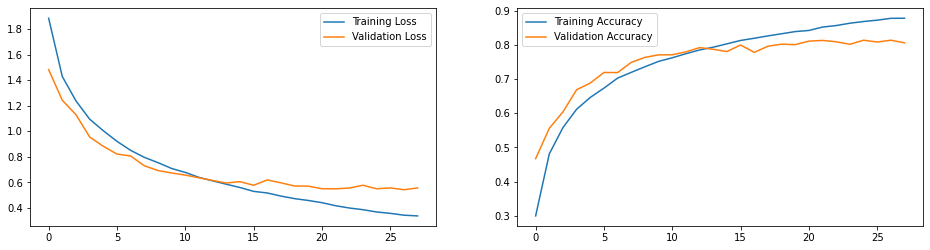

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()